# 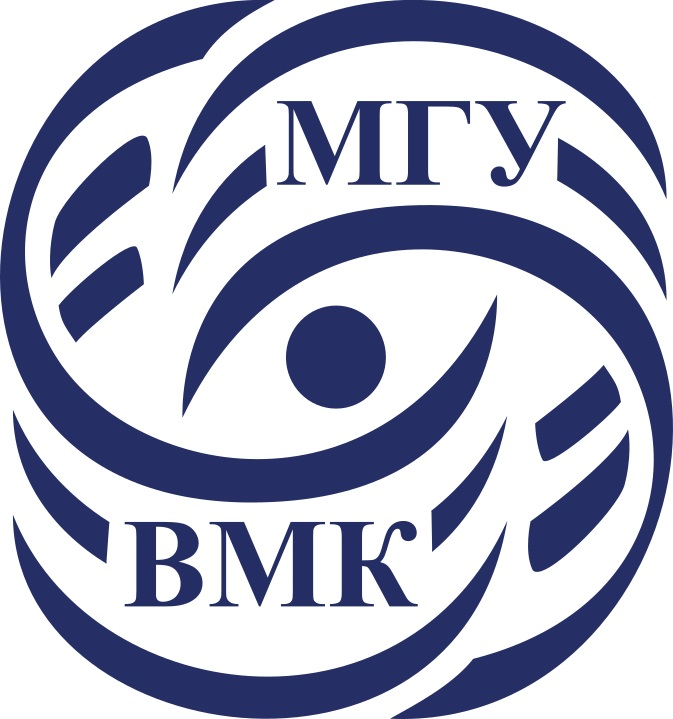

# Машинное обучение. ВМК МГУ

# Практическое задание 10: Градиентный бустинг деревьев - часть 1

## Уровень: <font color='SkyBlue'>**Базовый (Base)**</font>

# О формате сдачи

🔷 **<font color='plum'>При решении ноутбука используйте данный шаблон</font>**

    ✅ Можно добавлять новые ячейки любых типов
    ❌ Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий


🔷 **<font color='plum'>При оценивании задач учитывается код</font>**

    ✅ Задания, в которых необходим код, обычно помечаются фразами "Your code here"/"Ваш код" и аналогичными
    ❌ Ответы на вопросы без сопутствующего кода оцениваются в 0 баллов
    ❌ Наличе работоспособного кода в ноутбуке, если на сказано иного, обязательно

🔷 **<font color='plum'>При оценивании задач учитываются выводы</font>**

    ✅ Задания, в которых необходимы выводы, обычно помечаются фразами Вывод"/"Ответ на вопрос"/"Ваш текст" и аналогичными
    ✅ Обычно выводы подразумевают под собой текстовый ответ (можно писать markdown, latex).
    ✅ Сопутствующие изображения, графики, таблички - приветствуются!
    ❌ При отсутствии выводов задание не засчитается на полный балл

-----------
<font color="white" style="opacity:0.2024"></font>







__В этом задании вы..:__

- Познакомитесь с несколькими новыми библиотеками машинного обучения
- Сравните между собой разные реализации градиентных бустингов

----

<font color="white" style="opacity:0.2024"></font>
<font color=DarkOrange>**Примерное время выполнения (execution time/время выполнения, если нажать run all) всех ячеек ноутбука при правильной реализации: не более 60 минут </font>**

# Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать.

После установки нужных версий, **возможно,** нужно перезагрузить среду (runtime), но скорее всего вам это не понадобится


На скачивание файла и установку понадобится не более 5 минут.

<font color='OrangeRed'>**Важно!**</font>

Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

<font color='OrangeRed'>**Важно!**</font>
Если вы предпочитаете делать практические задания на своем личном ноутбуке, то проверьте, что вы установили рабочее окружение в [соответствии с гайдом](https://github.com/MSU-ML-COURSE/ML-COURSE-24-25/blob/main/tutorials/%D0%A2%D1%83%D1%82%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%20%D0%BF%D0%BE%20%D1%83%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BA%D0%B5%20%D1%80%D0%B0%D0%B1%D0%BE%D1%87%D0%B5%D0%B3%D0%BE%20%D0%BE%D0%BA%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B2%20Python%20%D0%B4%D0%BB%D1%8F%20%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%20(2).pdf)


In [ ]:
# !!! Данный блок будет работать только в Google-Colab !!!
! gdown 10k8Hwn9kpK9SpK4IEj4-EaWQZqgYT5-Q
! pip install -r /content/requirements_2024_25_for_colab_small.txt

In [ ]:
import catboost
assert(catboost.__version__ == '1.2.7')

Теперь можно приступать к выполнению задания! :)

-----------
<font color="white" style="opacity:0.2024"></font>




## Введение

Привет, ребятушки!

Сегодня мы с вами будем решать очень важную задачу, а именно оценивать цену поддержанных автомобилей в ряде стран. Делать мы это будем с помощью различных методов градиентного бустинга. Мы с вами узнаем, что в мире существует не только sklearn, и что существуют библиотеки, облегчающие нам задачу поиска оптимальных параметров для моделей.

<font color='OrangeRed'>**Внимание!**</font> Во всех заданиях в качестве целевой метрики используется MAE (средняя абсолютная ошибка).

Значение MAE вычисляется как

$$
  MAE = \sum_{i = 1}^N\dfrac{|a(x_i) - y_i|}{N},
$$

где $N$ - число объектов в тестовой выборке, $x_i$ - вектор признаков i-го объекта, $a(x_i)$ - предсказание на i-ом объекте, $y_i$ - значение целевого признака на i-м объекте.

## Установка дополнительных библиотек.

В этом задании нам понадобятся три бибиотеки, которыми вы ранее не пользовались в этом курсе, а именно:

<font color='plum'>**XGBoost**:</font> Документация [здесь](https://xgboost.readthedocs.io/en/stable/).<br />
<font color='plum'>**LightGBM**:</font> Документация [здесь](https://lightgbm.readthedocs.io/en/latest/index.html). Также дополнительно про установку [тут](https://pypi.org/project/lightgbm/).<br />
<font color='plum'>**Catboost**:</font> Документация [здесь](https://catboost.ai/en/docs/). Можно найти также некоторую информацию на русском [тут](https://habr.com/ru/company/otus/blog/527554/).<br />
<font color='plum'>**HyperOpt**:</font> Документация [здесь](http://hyperopt.github.io/hyperopt/). <br />


<font color='OrangeRed'>**Внимание!**</font> Вникать и подробно читать документацию к каждой библиотеке нет необходимости! Достаточно обращаться туда для нахождения примеров обучения.


## Подготовка датасета

Все библиотеки, используемые сегодня, мы будем проверять на одних и тех же параметрах:

```n_estimators=1000, max_depth=5, learning_rate=0.1.```

Таким образом мы устанавливаем, соответственно, число деревьев в ансамбле равным 1000, ограничиваем максимальную глубину деревьев 5 и устанавливаем темп обучения равным 0.1. Создадим сразу словарь, чтобы передавать эти параметры создаваемым регрессорам (если вдруг не знали, словарь можно передавать как параметры, поставив перед ним **).

Эти параметры мы вынесем в отдельную переменную `test_parameters`.

При желании можно почитать про этот датасет на платформе kaggle: [ссылка на данные](https://www.kaggle.com/bushnag/cars-in-the-middle-east?select=dataframe_YesIndex_YesHeader_C.csv). <span style="color:red"> <font color="OrangeRed">Не скачивайте датасет из kaggle для выполнения ноутбука, поскольку его могут изменить.</font></span> Нас интересует файл dataframe_YesIndex_YesHeader_C.csv, поскольку он уже хорошо предобработан (хотя, конечно, датасаентисты должны сами уметь это делать, но ладно).
Давайте попробуем загрузить датасет в память и посмотреть, как он выглядит.

При работе в google colab для скачивания датасета достаточно запустить следующую ячейку.

При работе с ноутбуком <span style="color:red"> <font color="OrangeRed">на локальном компьютере</font></span> Вы можете скачать файл по [этой ссылке](https://drive.google.com/file/d/1gdDv2kTCEkF3ia1vvbvRFJM0YfqmPplb/view?usp=sharing) и чуть ниже заменить ` /content/dataframe_YesIndex_YesHeader_C.csv` (в строке с `read_csv`) на ваш локальный путь до файла.

In [ ]:
# при локальном выполнении запускать эту ячейку НЕ НАДО
!gdown 1gdDv2kTCEkF3ia1vvbvRFJM0YfqmPplb

Downloading...
From: https://drive.google.com/uc?id=1gdDv2kTCEkF3ia1vvbvRFJM0YfqmPplb
To: /content/dataframe_YesIndex_YesHeader_C.csv
100% 568k/568k [00:00<00:00, 100MB/s]


In [ ]:
%matplotlib inline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, make_scorer

from hyperopt import hp, tpe, Trials
from hyperopt.fmin import fmin
from hyperopt.pyll import scope

from xgboost import XGBRegressor

from lightgbm import LGBMRegressor

from catboost import CatBoostRegressor

from IPython.display import clear_output

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import numpy as np

import time

In [ ]:
test_parameters = {"n_estimators": 1000, "max_depth": 5, "learning_rate":0.1}

df = pd.read_csv('/content/dataframe_YesIndex_YesHeader_C.csv', index_col=0)
df.head()

,Engine Capacity,Cylinders,Drive Type,Fuel Tank Capacity,Fuel Economy,Fuel Type,Horsepower,Torque,Transmission,Top Speed,...,Acceleration,Length,Width,Height,Wheelbase,Trunk Capacity,name,price,currency,Country
0,1.2,3,0,42.0,4.9,0,76,100.0,0,170,...,14.0,4.245,1.670,1.515,2.550,450.0,Mitsubishi Attrage 2021 1.2 GLX (Base),34099.0,0,0
1,1.2,3,0,42.0,4.9,0,76,100.0,0,170,...,14.0,4.245,1.670,1.515,2.550,450.0,Mitsubishi Attrage 2021 1.2 GLX (Base),34099.0,0,0
2,1.4,4,0,45.0,6.3,0,75,118.0,1,156,...,16.0,3.864,1.716,1.721,2.513,2800.0,Fiat Fiorino 2021 1.4L Standard,41250.0,0,0
3,1.6,4,0,50.0,6.4,0,102,145.0,0,180,...,11.0,4.354,1.994,1.529,2.635,510.0,Renault Symbol 2021 1.6L PE,44930.0,0,0
4,1.5,4,0,48.0,5.8,0,112,150.0,0,170,...,10.9,4.314,1.809,1.624,2.585,448.0,MG ZS 2021 1.5L STD,57787.0,0,0


### <font color='DarkOrange'>**Задание 0 [без проверки, 0 баллов]**</font>

Посмотрите на цены автомобилей. Попробуйте понять, написаны они в одной валюте или нет. Если нет -- будут ли у нас серьезные проблемы при использовании деревьев? Стоит ли нам что-то сделать для того, чтобы нивелировать эту проблему?


In [ ]:
country_map = {
    0: 'KSA',
    1: 'USA',
    2: 'Qatar',
    3: 'Kuwait',
    4: 'Oman',
    5: 'Bahrain'
}

print(df['Country'].map(country_map).unique())

['KSA' 'USA' 'Bahrain' 'Kuwait' 'Oman' 'Qatar']


In [ ]:
print(df['price'].describe())

count    4.560000e+03
mean     1.487423e+05
std      3.466023e+05
min      2.899000e+03
25%      1.690000e+04
50%      5.210000e+04
75%      1.741925e+05
max      1.078000e+07
Name: price, dtype: float64


Представлена информация об авто разных стран: KSA (0), USA (1), Qatar (2), Kuwait (3), Oman (4), Bahrain (5), да и по статистикам видно, что разброс в ценах большой. То есть цены действительно в разных валютах

Деревья не чувствительны к масштабу данных, но чрезмерно большие или маленькие значения могут повлиять на выбор порогов разбиения. Так что в этом случае они могут отдавать предпочтение ценам в более крупной валюте, в принципе неправильно интерпретировать цены и создавать искусственные границы разделения, которые не имеют смысла в контексте реальных цен

Самое очевидное решение — привести все к одной валюте. Сделать это, например, через словарь курсов валют. Можно опосредованно учитывать признак currency

Можно использовать деревья решений в составе ансамблей: градиентный бустинг или случайный лес. Эти методы более устойчивы по сравнению с одиночными деревьями решений

----

В глаза бросаются две проблемы: у нас имеется информация о производителе автомобиля, скрытая в текстовой переменной модели автомобиля (нет отдельного признака). Также имеются некоторые категориальные переменные. Со всем этим безобразием надо что-то сделать.


### <font color='DarkOrange'>**Задание 1 [2 балла]**</font>

**Данные**: датасет со стоимостью подержанных автомобилей  
**Цели**: В данном задании следует выполнить следующие пункты:
1. Изучить датасет, проверить наличие `пропусков.` Под пропусками подразумевается значение N/A вместо признака. При необходимости заменить их на среднее значение признака.
3. Добавить `столбец brand` с информацией о производителе автомобиля (для простоты можно взять первое слово в названии модели).
4. Решить, какие признаки Вы считаете `категориальными.` Конвертировать выбранные категориальные столбцы в тип category.
5. Создать `датасет А`, в котором выбранные категориальные признаки установлены как категориальные. Для этого необходимо создать вектор целевых значений Y (столбец цен автомобилей) и матрицу признаков X, в которой все категориальные переменные помечены как .astype('category'). Дополнительно стоит создать список с названиями и индексами столбцов категориальных переменных (поможет в будущем).
6. Создать `датасет B` без категориальных признаков. Для этого необходимо просто удалить из матрицы признаков все категориальные переменные.
7. Создать `датасет C`, в котором выбранные категориальные признаки закодированы через one-hot encoding. Для этого необходимо из матрицы признаков удалить выбранные категориальные переменные, а затем добавить новые признаки, соответствующие one-hot encoding этих категориальных переменных (со всей этой магией поможет простая функция `pd.get_dummies`).
8. Разбить датасеты на `тренировочное и тестовое множества`, используя `train_test_split(X, y, test_size=0.25, random_state=0)` (зафиксировав random_seed мы получим одинаковое разбиение на обучение/тест для всех трёх выборок).


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4560 entries, 0 to 5667
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Engine Capacity     4560 non-null   float64
 1   Cylinders           4560 non-null   int64  
 2   Drive Type          4560 non-null   int64  
 3   Fuel Tank Capacity  4560 non-null   float64
 4   Fuel Economy        4560 non-null   float64
 5   Fuel Type           4560 non-null   int64  
 6   Horsepower          4560 non-null   int64  
 7   Torque              4560 non-null   float64
 8   Transmission        4560 non-null   int64  
 9   Top Speed           4560 non-null   int64  
 10  Seating Capacity    4560 non-null   int64  
 11  Acceleration        4560 non-null   float64
 12  Length              4560 non-null   float64
 13  Width               4560 non-null   float64
 14  Height              4560 non-null   float64
 15  Wheelbase           4560 non-null   float64
 16  Trunk Capac

In [ ]:
print(df.isnull().sum())

Engine Capacity       0
Cylinders             0
Drive Type            0
Fuel Tank Capacity    0
Fuel Economy          0
Fuel Type             0
Horsepower            0
Torque                0
Transmission          0
Top Speed             0
Seating Capacity      0
Acceleration          0
Length                0
Width                 0
Height                0
Wheelbase             0
Trunk Capacity        0
name                  0
price                 0
currency              0
Country               0
dtype: int64


In [ ]:
df['brand'] = df['name'].str.split().str[0]

In [ ]:
categorical_columns = ['brand', 'Drive Type', 'Fuel Type', 'Transmission', 'currency', 'Country']
df[categorical_columns] = df[categorical_columns].astype('category')

In [ ]:
Y = df['price']
X_A = df.drop(['price', 'name'], axis=1)
X_B = X_A.drop(categorical_columns, axis=1)
X_C = pd.get_dummies(X_A, columns=categorical_columns)

categorical_info = [(col, df.columns.get_loc(col)) for col in categorical_columns]

X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(X_A, Y, test_size=0.25, random_state=0)
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X_B, Y, test_size=0.25, random_state=0)
X_train_C, X_test_C, y_train_C, y_test_C = train_test_split(X_C, Y, test_size=0.25, random_state=0)

datasets = {
    'A': (X_train_A, X_test_A, y_train_A, y_test_A),
    'B': (X_train_B, X_test_B, y_train_B, y_test_B),
    'C': (X_train_C, X_test_C, y_train_C, y_test_C)
}

Итак, кажется, что у нас всё готово для того, чтобы начать искать ответы на волнующие нас вопросы. Начнем со столь любимой нами библиотеки, а именно...

## Градиентный бустинг со sklearn

Естественно, в `sklearn` имеется реализация градиентного бустинга, которая хранится в `sklearn.ensemble.GradientBoostingRegressor`. Преимущественно данным классом пользуются в учебных заданиях, а в реальных задачах предпочтение отдаётся другим библиотекам. Давайте попробуем понять, заслуженно ли градиентный бустинг в sklearn не пользуется популярностью.

FYI: в sklearn имеется также реализация `GradientBoostingClassifier` для задач классификации, но пользоваться им мы сегодня не будем.

`GradientBoostingRegressor` из коробки не умеет работать с категориальными признаками. Мы к этому уже подготовились, закодировав наши признаки.



### <font color='DarkOrange'>**Задание 2 [1.5 баллa]**</font>

**Данные**: датасет со стоимостью поддержанных автомобилей    
**Метрика**: MAE    
**Цели**: В данном задании следует выполнить следующие пункты:    
1. Обучить sklearn.ensemble.GradientBoostingRegressor на `датасетах B и C `(получится два разных регрессора), используя параметры n_estimators=1000, max_depth=5, learning_rate=0.1 (наши `test_parameters`). Замерить время обучения.
2. Посчитать `MAE` для предсказаний на соответствующих тренировочном и тестовом множествах (можно воспользоваться sklearn.metrics.mean_absolute_error). Замерить время предсказания.
3. Вывести в `таблице DataFrame` результаты о времени обучения, времени предсказания, MAE на тренировочном и тестовом множествах.
<font color='red'>**Внимание!**</font> Для каждого из последующих заданий создавайте новые переменные для таблиц DataFrame - в задании 6 необходимо будет объединить все полученные результаты
4. `Сделайте выводы.` Оцените полезность категориальных переменных. Оцените время, затраченное на обучение. Попробуйте дать оценку получившемуся MAE: оно большое или маленькое?


In [ ]:
def train_and_evaluate_skl(datasets, test_parameters):
    df_skl = pd.DataFrame(columns=['Dataset', 'Training time', 'Prediction time', 'Train MAE', 'Test MAE'])

    for dataset_name, (X_train, X_test, y_train, y_test) in datasets.items():
        model = GradientBoostingRegressor(**test_parameters)

        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()
        training_time = end_time - start_time

        start_time = time.time()
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        end_time = time.time()
        prediction_time = end_time - start_time

        train_mae = mean_absolute_error(y_train, y_pred_train)
        test_mae = mean_absolute_error(y_test, y_pred_test)

        df_skl = pd.concat([df_skl, pd.DataFrame({
            'Dataset': [dataset_name],
            'Training time': [training_time],
            'Prediction time': [prediction_time],
            'Train MAE': [train_mae],
            'Test MAE': [test_mae]
        })], ignore_index=True)

    return df_skl

In [ ]:
df_skl_bc = train_and_evaluate_skl({k: datasets[k] for k in ['B', 'C']}, test_parameters)
clear_output()
print(df_skl_bc)

  Dataset  Training time  Prediction time     Train MAE       Test MAE
0       B      11.794120         0.100302  91885.188873  123268.258435
1       C      19.474397         0.101441   4505.485242   18006.948511


In [ ]:
mean_price = df['price'].mean()
mae_c = df_skl_bc.loc[df_skl_bc['Dataset'] == 'C', 'Test MAE'].values[0]
percentage = (mae_c / mean_price) * 100

print(f"MAE is approximately {percentage:.2f}% of the average price")

MAE is approximately 12.11% of the average price


**<font color='MediumOrchid'>Ваши выводы:</font>**

Использование категориальных переменных улучшило качество модели как на тренировочном, так и на тестовом наборах, что указывает на их значимость для предсказания целевой переменной

Время обучения на датасете с категориальными переменными увеличилось

Наименьшая полученная ошибка на test составляет примерно 12% от средней цены. Это значит, что при средней цене автомобиля 150 000 единиц модель ошибается примерно на 18 000 единиц. То есть в зависимости от валюты будет ошибаться примерно на 4 860 / 18 000 / 47 700 / 3,25 / 2,6 / 0,27 долларов (SAR/USD/BHD/KWD/OMR/QAR). В контексе цены авто первые три значения достаточно большие, то есть для валют SAR/USD/BHD это достаточно большая ошибка. Однако три оставшихся значения небольшие (для валют KWD/OMR/QAR)








----------------------------------------------
<font color="white" style="opacity:0.2024"></font>

И так, sklearn предлагает нам привычный и простой способ тренировки моделей. Однако, для градиентного бустинга существует множество эвристик и трюков, помогающих улучшить результаты. И одна из библиотек, реализующая улучшенную версию бустинга, называется xgboost.

## Градиентный бустинг с XGBoost

<font color='CornflowerBlue'>**XGBoost**</font> стала достаточно популярной библиотекой, которая позволяет добиться хороших результатов без особых усилий (во всяком случае, так гласят легенды). И у нас для вас две новости: хорошая и плохая. Хорошая – xgboost, хоть и является сторонней библиотекой, сохраняет интерфейс sklearn. Плохая – она тоже не умеет из коробки работать с категориальными признаками. Ну что же, давайте пощупаем это безобразие. На этот раз нас интересует класс xgboost.XGBRegressor.

<font color='MediumTurquoise'>**Daily Fact:**</font> на самом деле в xgboost есть экспериментальная поддержка категориальных переменных, которая еще не добавлена в стабильную версию, поэтому ею мы пользоваться не будем.




### <font color='DarkOrange'>**Задание 3 [1.5 баллa]**</font>

**Данные**: датасет со стоимостью поддержанных автомобилей  
**Метрика**: MAE  
**Цели**: В данном задании следует выполнить следующие пункты:  
1. Обучить `xgboost.XGBRegressor` на `датасетах B и C`, используя параметры ```n_estimators=1000, max_depth=5, learning_rate=0.1``` (наши `test_parameters`). Замерить время обучения.
2. Посчитать `MAE` для полученных предсказаний на соответствующих тренировочном и тестовом множествах (можно воспользоваться `sklearn.metrics.mean_absolute_error`). Замерить время предсказания
3. Вывести в `таблице DataFrame` результаты о времени обучения, времени предсказания, MAE на тренировочном и тестовом множествах.
4. `Сделайте выводы.` Оцените время, затраченное на обучение, сравните с sklearn.

In [ ]:
def train_and_evaluate_xgb(datasets, test_parameters):
    df_xgb = pd.DataFrame(columns=['Dataset', 'Training time', 'Prediction time', 'Train MAE', 'Test MAE'])

    for dataset_name, (X_train, X_test, y_train, y_test) in datasets.items():
        model = XGBRegressor(**test_parameters)

        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()
        training_time = end_time - start_time

        start_time = time.time()
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        end_time = time.time()
        prediction_time = end_time - start_time

        train_mae = mean_absolute_error(y_train, y_pred_train)
        test_mae = mean_absolute_error(y_test, y_pred_test)

        df_xgb = pd.concat([df_xgb, pd.DataFrame({
            'Dataset': [dataset_name],
            'Training time': [training_time],
            'Prediction time': [prediction_time],
            'Train MAE': [train_mae],
            'Test MAE': [test_mae]
        })], ignore_index=True)

    return df_xgb

In [ ]:
df_xgb_bc = train_and_evaluate_xgb({k: datasets[k] for k in ['B', 'C']}, test_parameters)
clear_output()
print(df_xgb_bc)

  Dataset  Training time  Prediction time     Train MAE       Test MAE
0       B       1.351834         0.083941  92598.835913  122902.749596
1       C       2.016679         0.140223   5570.308856   18719.943561


**<font color='MediumOrchid'>Ваши выводы:</font>**

Относительно категориальных переменных и MAE выводы те же, что и в предыдущем пункте

Время обучения XGBoost на датасетах B, C почти одинаковое, на B чуть меньше

XGBoost значительно быстрее sklearn в обучении. MAE на test у XGBoost и Sklearn сравнимое

---

Таким вот несложным образом нам удалось воспользоваться еще одной библиотекой. Давайте перейдем к третьей библиотеке, которую мы сегодня изучим, и называется она lightgbm.

## Градиентный бустинг в lightgbm

Про <font color='CornflowerBlue'>**Lightgbm**</font> легенды гласят, что она очень быстрая и легкая: что самый большой датасет она без проблем переварит за относительно небольшое время. А еще её разрабатывали не хухры кто, а сами мелкомягкие, так что попробовать её определённо стоит. На этот раз у нас вновь две новости, две хороших и две плохих.

Первая хорошая — lightgbm тоже похож на sklearn. Вторая хорошая — lightgbm умеет из коробки работать с категориальными признаками!

Плохая — делает она это немного нетривиально (не зря я просил вас запомнить категориальные переменные!). Вторая плохая — да, нам придётся этим пользоваться для выполнения задания.

<font color='OrangeRed'>**Внимание!**</font> `LightGBM` может писать сотню радостных сообщений о том, что он увидел ваши categorical_feature и использует их. При желании можете заглушать эти оповещения, ибо в случае перебора параметров их становится слишком много. (заклинание для заглушения: `warnings.filterwarnings("ignore")`)




### <font color='DarkOrange'>**Задание 4 [1.5 баллa]**</font>
**Данные**: датасет со стоимостью поддержанных автомобилей  
**Метрика**: MAE  
**Цели**: В данном задании следует выполнить следующие пункты:  
1. В случае датасета, сохраненном в numpy, lightgbm требует, чтобы категории были закодированы целыми числами от 0 до числа признаков(e.g. ['a', 'b', 'a'] -> [0, 1, 0]). Сделайте это для `датасета A`. Если вы используете pandas, то для датасета A достаточно установить соответствующие столбцы типа "категория", тогда categorical_feature='auto' сам всё подхватит.
2. Обучить `lightgbm.LGBMRegressor` на `датасетах A, B и C`, используя параметры ```n_estimators=1000, max_depth=5, learning_rate=0.1.``` В случае датасета A, передайте в функцию fit индексы/имена категориальных признаков. Замерить время обучения.
4. Посчитать `MAE` для полученных предсказаний на соответствующих тренировочном и тестовом множествах (можно воспользоваться sklearn.metrics.mean_absolute_error).
5. `Сделайте выводы` о полезности использования категориальных переменных и времени обучения.
6. Вывести результаты и время в `таблице DataFrame`.

In [ ]:
def train_and_evaluate_lightgbm(datasets, test_parameters):
    df_lightgbm = pd.DataFrame(columns=['Dataset', 'Training time', 'Prediction time', 'Train MAE', 'Test MAE'])

    for dataset_name, (X_train, X_test, y_train, y_test) in datasets.items():
        model = LGBMRegressor(**test_parameters)

        if dataset_name == 'A':
            categorical_features = [i for i, col in enumerate(X_train.columns) if X_train[col].dtype == 'category']
            start_time = time.time()
            model.fit(X_train, y_train, categorical_feature=categorical_features)
            end_time = time.time()
        else:
            start_time = time.time()
            model.fit(X_train, y_train)
            end_time = time.time()

        training_time = end_time - start_time

        start_time = time.time()
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        end_time = time.time()
        prediction_time = end_time - start_time

        train_mae = mean_absolute_error(y_train, y_pred_train)
        test_mae = mean_absolute_error(y_test, y_pred_test)

        df_lightgbm = pd.concat([df_lightgbm, pd.DataFrame({
            'Dataset': [dataset_name],
            'Training time': [training_time],
            'Prediction time': [prediction_time],
            'Train MAE': [train_mae],
            'Test MAE': [test_mae]
        })], ignore_index=True)

    return df_lightgbm

In [ ]:
df_lightgbm_abc = train_and_evaluate_lightgbm(datasets, test_parameters)
clear_output()
print(df_lightgbm_abc)

  Dataset  Training time  Prediction time     Train MAE       Test MAE
0       A       0.557177         0.365120  16817.028911   25444.522235
1       B       0.504551         0.331225  97464.815217  122524.868492
2       C       0.776414         0.388861  21020.383955   31347.700217


**<font color='MediumOrchid'>Ваши выводы:</font>**

Использование категориальных переменных улучшает качество (25444 на A и 31347 на C против 122524 на B)

В данном случае использование категорий напрямую в LightGBM оказалось более эффективным, чем OHE (25444 на A против 31347 на C)

В результатах видим, что время обучения на A, B, C сравнимо. LightGBM использует достаточно оптимизированные методы

----

Как вы видите, иногда можно не возиться с OHE, а позволить библиотекам самим это сделать (хотя иногда при этом приходится повозиться с самими данными, чтобы библиотека их съела).

Итак, мы с вами почти стали мастерами градиентного бустинга. Переходим к последней звезде нашего хит-парада.


## Градиентный бустинг в catboost

_**Пролог:** Why does catboost need random seed? It grows random trees!_

Библиотека, созданная в тёмных подвалах Яндекса. По легендам эта библиотека умеет работать с категориальными данными, быстрая, эффективная, легко настраивается, из коробки понимает текстовые признаки в задачах классификации и спасла Брюса Уиллиса. Давайте проверим. В качестве регрессора нас интересует `catboost.CatBoostRegressor.`

<font color='OrangeRed'>**Внимание!**</font> Эта библиотека еще более болтлива, чем lightgbm, но это (почти) полностью лечится с помощью verbose. Однако ноутбуки всё равно неприлично разрастаются в размерах, поэтому просим вас сделать следующее: <font color='OrangeRed'> обучать catboost в первой ячейке и очистить её вывод перед сдачей. </font> Все необходимые выводы стоит делать во второй ячейке. Также можно воспользоваться clear_output()


А еще эта библиотека может неожиданно создать вам парочку новых папок...




### <font color='DarkOrange'>**Задание 5 [1.5 баллa]**</font>
**Данные**: датасет со стоимостью поддержанных автомобилей  
**Метрика**: MAE  
**Цели**: В данном задании следует выполнить следующие пункты:  
1. Обучить `catboost.CatBoostRegressor` на `датасетах A, B и C`, используя параметры используя параметры ```n_estimators=1000, max_depth=5, learning_rate=0, verbose=False.```
1. В случае `датасета A`, передайте на вход методу fit/конструктору параметр `cat_features`, содержащий имена/индексы категориальных переменных. В данном случае переводить категории в целые числа, как мы делали для lightgbm, не нужно. `Замерьте время обучения.`
3. Посчитать `MAE` для полученных предсказаний на соответствующих тренировочном и тестовом множествах (можно воспользоваться sklearn.metrics.mean_absolute_error).
4. `Сделайте выводы` о полезности использования категориальных переменных и времени обучения.
5. Вывести результаты и время в `таблице DataFrame.`


In [ ]:
def train_and_evaluate_catboost(datasets, test_parameters, cat_features=None):
    df_catboost = pd.DataFrame(columns=['Dataset', 'Training time', 'Prediction time', 'Train MAE', 'Test MAE'])

    for dataset_name, (X_train, X_test, y_train, y_test) in datasets.items():
        model = CatBoostRegressor(verbose=False, **test_parameters)

        if dataset_name == 'A' and cat_features is not None:
            start_time = time.time()
            model.fit(X_train, y_train, cat_features=cat_features)
            end_time = time.time()
        else:
            start_time = time.time()
            model.fit(X_train, y_train)
            end_time = time.time()

        training_time = end_time - start_time

        start_time = time.time()
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        end_time = time.time()
        prediction_time = end_time - start_time

        train_mae = mean_absolute_error(y_train, y_pred_train)
        test_mae = mean_absolute_error(y_test, y_pred_test)

        df_catboost = pd.concat([df_catboost, pd.DataFrame({
            'Dataset': [dataset_name],
            'Training time': [training_time],
            'Prediction time': [prediction_time],
            'Train MAE': [train_mae],
            'Test MAE': [test_mae]
        })], ignore_index=True)

    return df_catboost

In [ ]:
df_catboost_abc = train_and_evaluate_catboost(datasets, test_parameters, categorical_columns)
clear_output()
print(df_catboost_abc)

  Dataset  Training time  Prediction time     Train MAE       Test MAE
0       A       6.868438         0.044299  10116.287231   15551.404763
1       B       2.042698         0.012853  99789.276036  121533.351949
2       C       2.791335         0.033751  11313.623673   19916.889475


**<font color='MediumOrchid'>Ваши выводы:</font>**

Использование категориальных переменных улучшает качество модели (15551 на A и 19916 на C против 121533 на B)

В данном случае использование категорий напрямую в CatBoost оказалось более эффективным, чем OHE (15551 на A против 19916 на C)

Время обучения для A больше, чем для B и C. CatBoost тратит чуть больше времени на обработку незакодированных категориальных признаков, чем на числовые признаки или dummy-переменные

----

И так, мы наконец познакомились со всеми библиотеками градиентного бустинга.

## Обобщение результатов

На текущем этапе у вас должно быть несколько датафреймов результатами по каждой библиотеке. Мы, конечно, сделали некоторые выводы, но пришло время собрать это в красивый отчет.



### <font color='DarkOrange'>**Задание 6 [2 баллa]**</font>
**Данные**: датасет с ценами поддержанных автомобилей  
**Цели**: В данном задании следует выполнить следующие пункты:  
1. При помощи `одного или нескольких графиков` показать результаты различных библиотек: времени работы и качество результатов. Можете воспользоваться любым типом графиков: гистограммы, scatter и т.д. По этим графикам должно быть понятно какая библиотека и насколько быстрее, насколько различается их качество, сравнение оптимизированных и неоптимизированных параметров.
2. По графикам `сравните` библиотеки, производительность и качество работы. Опишите `ваши выводы` ниже.

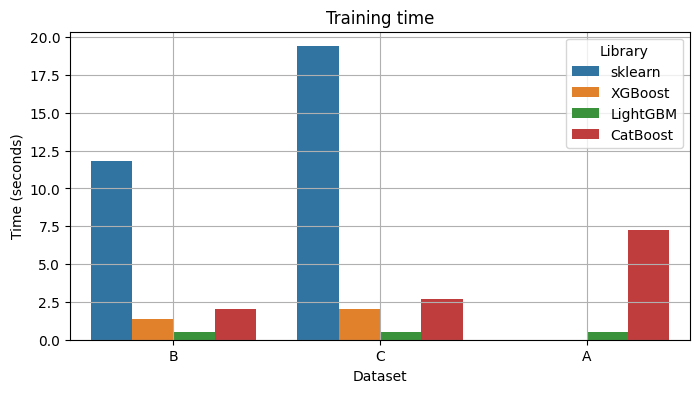

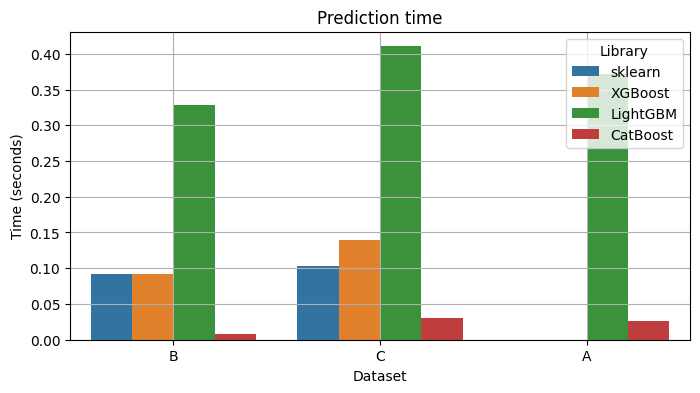

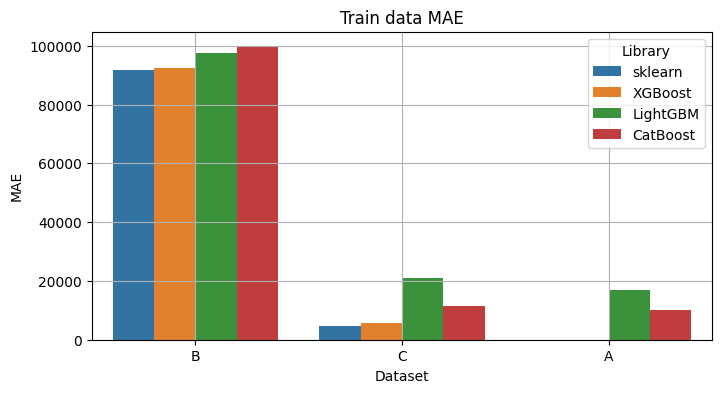

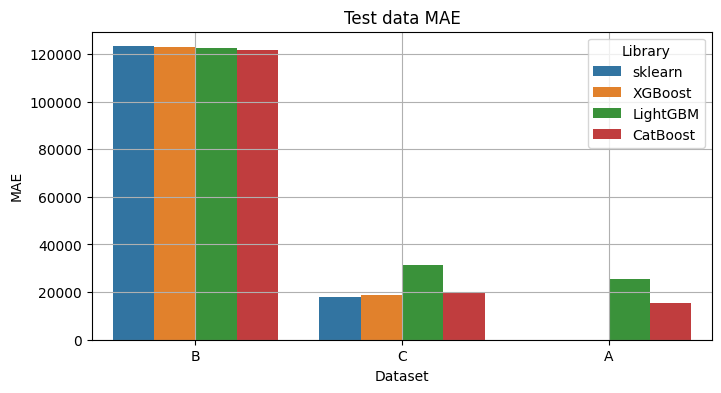

In [ ]:
df_all = pd.DataFrame()

for lib, datasets in results.items():
    for ds in datasets:
        row = ds.copy()
        row['Library'] = lib
        df_all = pd.concat([df_all, pd.DataFrame([row])], ignore_index=True)

plt.figure(figsize=(8, 4))
sns.barplot(x='Dataset', y='Training time', hue='Library', data=df_all)
plt.title('Training time')
plt.ylabel('Time (seconds)')
plt.xlabel('Dataset')
plt.grid()
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(x='Dataset', y='Prediction time', hue='Library', data=df_all)
plt.title('Prediction time')
plt.ylabel('Time (seconds)')
plt.xlabel('Dataset')
plt.grid()
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(x='Dataset', y='Train MAE', hue='Library', data=df_all)
plt.title('Train data MAE')
plt.ylabel('MAE')
plt.xlabel('Dataset')
plt.grid()
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(x='Dataset', y='Test MAE', hue='Library', data=df_all)
plt.title('Test data MAE')
plt.ylabel('MAE')
plt.xlabel('Dataset')
plt.grid()
plt.show()

**<font color='MediumOrchid'>Ваши выводы:</font>**

**Время работы**<br>
Быстрее всего обучается LightGBM. XGBoost и CatBoost также показывают неплохое время работы. Sklearn оказался медленее всех. LightGBM медленнее всех делал предсказания, однако, в отличие от времени обучения, разница в долях секунды

**Качество**<br>
Лучшее качество на test показали CatBoost на A, B и sklearn на C. Хотя на B качество моделей оказалось сравнимым. На A, C худшее качество показал LightGBM

**Оптимальный выбор**<br>
Вероятно, лучший из представленных вариантов — это CatBoost с использованием категориальных признаков напрямую, без предварительного OHE, поскольку показывает хороший баланс между временем обучения и качеством предсказаний относительно других моделей